In [749]:
import os
import sys
import subprocess
import numpy as np
import json
import pandas as pd
import shutil
import librosa.display
import matplotlib
import matplotlib.pyplot as plt
import csv
import IPython.display as ipd

## COVID COSWARA DATASET ANALYSIS

1. IMPORTING THE DATA SET

In [750]:
training_data = pd.read_csv('training.csv')
testing_data = pd.read_csv('test.csv')

In [751]:
training_data.head()

,id,path,date,status,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,...,delta2_mfcc4,delta2_mfcc5,delta2_mfcc6,delta2_mfcc7,delta2_mfcc8,delta2_mfcc9,delta2_mfcc10,delta2_mfcc11,delta2_mfcc12,delta2_mfcc13
0,Tpz3FMkc1NPmXLufylt9YVf9NQG3,/home/abhijeet/Desktop/extracted/20210930/Tpz3...,20210927,positive,0.398262,0.021807,2192.284336,1800.806374,3899.732548,0.190792,...,0.182011,0.105570,0.102463,-0.040326,0.052916,0.182637,0.107316,-0.116739,-0.029148,0.129039
1,4w3GC0eRNVXJ4q4vRLphW9RIiQY2,/home/abhijeet/Desktop/extracted/20210618/4w3G...,20210609,negative,0.276679,0.038540,1144.252719,961.642738,2104.043384,0.085649,...,0.037926,0.016237,0.011370,0.002623,-0.001219,-0.005557,-0.007667,-0.009922,-0.011224,-0.012732
2,xyDgyXrDoyXu5CFqcNe20LRjYqg1,/home/abhijeet/Desktop/extracted/20200413/xyDg...,20200413,negative,0.296851,0.062692,1751.262780,1133.773623,2917.275293,0.127885,...,0.051888,-0.038112,0.023294,-0.085726,-0.047723,-0.085052,-0.045277,-0.019182,-0.000075,0.004684
3,jvrGsRzHKEU4izNgLFGitM7AZVK2,/home/abhijeet/Desktop/extracted/20200418/jvrG...,20200417,negative,0.496647,0.057254,1870.679548,1861.172536,3787.404027,0.187998,...,0.216941,0.005055,0.023386,-0.011039,0.034167,-0.022315,0.037435,-0.032717,0.022867,-0.071486
4,zvXkuEaPb0OEgG4EHx59NqdmamR2,/home/abhijeet/Desktop/extracted/20200413/zvXk...,20200413,negative,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [752]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591 entries, 0 to 1590
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1591 non-null   object 
 1   path                1591 non-null   object 
 2   date                1591 non-null   int64  
 3   status              1591 non-null   object 
 4   chroma_stft         1591 non-null   float64
 5   rmse                1591 non-null   float64
 6   spectral_centroid   1591 non-null   float64
 7   spectral_bandwidth  1591 non-null   float64
 8   rolloff             1591 non-null   float64
 9   zero_crossing_rate  1591 non-null   float64
 10  mfcc1               1591 non-null   float64
 11  mfcc2               1591 non-null   float64
 12  mfcc3               1591 non-null   float64
 13  mfcc4               1591 non-null   float64
 14  mfcc5               1591 non-null   float64
 15  mfcc6               1591 non-null   float64
 16  mfcc7 

In [753]:
training_data.describe()

,date,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,delta2_mfcc4,delta2_mfcc5,delta2_mfcc6,delta2_mfcc7,delta2_mfcc8,delta2_mfcc9,delta2_mfcc10,delta2_mfcc11,delta2_mfcc12,delta2_mfcc13
count,1.591000e+03,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,...,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000
mean,2.020443e+07,0.406829,0.045592,2193.867778,1824.192501,4125.824232,0.181911,422.899660,45.826480,2.014669,...,0.051183,0.040421,0.030066,0.025490,0.026223,0.017538,0.020019,0.014644,0.013950,0.011553
std,5.446740e+03,0.106832,0.028826,721.065178,551.340809,1378.031096,0.084575,233.384628,16.002139,7.626547,...,0.075588,0.077324,0.061585,0.066164,0.056185,0.056552,0.053089,0.046884,0.053995,0.049071
min,2.020041e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1131.371094,0.000000,-26.953989,...,-0.310571,-0.211879,-0.362671,-0.394481,-0.376856,-0.721110,-0.518481,-0.294176,-0.174240,-0.216221
25%,2.020042e+07,0.360935,0.025953,1762.313938,1562.237018,3297.028122,0.124003,442.110748,35.302702,-3.236651,...,0.008208,0.003963,0.000000,-0.003532,-0.002282,-0.009045,-0.007083,-0.011342,-0.012237,-0.014533
50%,2.020081e+07,0.424056,0.042933,2198.716768,1852.835804,4168.079144,0.171114,489.791931,47.164124,1.845281,...,0.044107,0.031628,0.024477,0.016567,0.019278,0.011561,0.014893,0.009813,0.009819,0.005672
75%,2.021053e+07,0.470618,0.060212,2626.605387,2154.488159,4974.781232,0.228354,504.448715,56.779280,7.252016,...,0.082406,0.065659,0.055626,0.051794,0.050794,0.038972,0.042231,0.036472,0.032834,0.031765
max,2.022012e+07,0.724602,0.353803,5220.270356,3481.107517,9184.655632,0.734859,544.405640,90.759247,31.046881,...,1.010437,1.485572,0.732784,0.718208,0.435413,0.599475,0.453565,0.387778,1.196829,0.587307


In [754]:
print("Training Data Shape:",training_data.shape)
print("Testing Data Shape:",testing_data.shape)


Training Data Shape: (1591, 49)
Testing Data Shape: (682, 48)


## EXPLORATORY DATA ANALYSIS (EDA)

In [755]:
mfcc_data = training_data[['mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13']].values

delta1_mfcc_data = training_data[['delta1_mfcc1','delta1_mfcc2','delta1_mfcc3','delta1_mfcc4','delta1_mfcc5','delta1_mfcc6','delta1_mfcc7','delta1_mfcc8','delta1_mfcc9','delta1_mfcc10','delta1_mfcc11','delta1_mfcc12','delta1_mfcc13']].values

delta2_mfcc_data = training_data[['delta2_mfcc1','delta2_mfcc2','delta2_mfcc3','delta2_mfcc4','delta2_mfcc5','delta2_mfcc6','delta2_mfcc7','delta2_mfcc8','delta2_mfcc9','delta2_mfcc10','delta2_mfcc11','delta2_mfcc12','delta2_mfcc13']].values

In [756]:
import sklearn
scaler = sklearn.preprocessing.MinMaxScaler(feature_range = (0, 1))
scaler = scaler.fit(mfcc_data)
mfcc_data  = scaler.transform(mfcc_data)

In [757]:
print(mfcc_data[0])

[0.97308523 0.48611276 0.33129246 0.62424916 0.67763561 0.45270047
 0.40901249 0.46862733 0.25503445 0.33999163 0.5000929  0.50589307
 0.44547166]


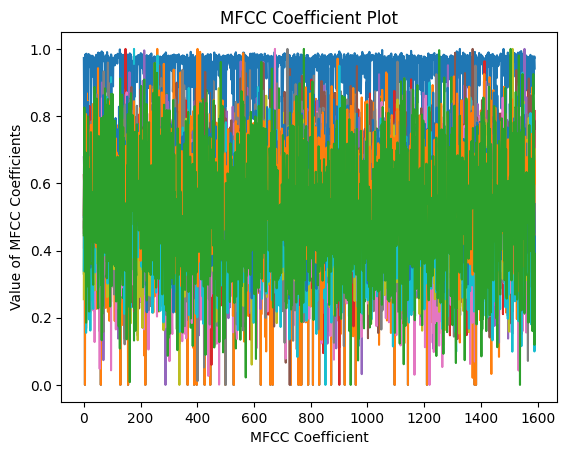

In [758]:
plt.ylabel('Value of MFCC Coefficients')
plt.xlabel('MFCC Coefficient')
plt.title('MFCC Coefficient Plot')
plt.plot(mfcc_data)


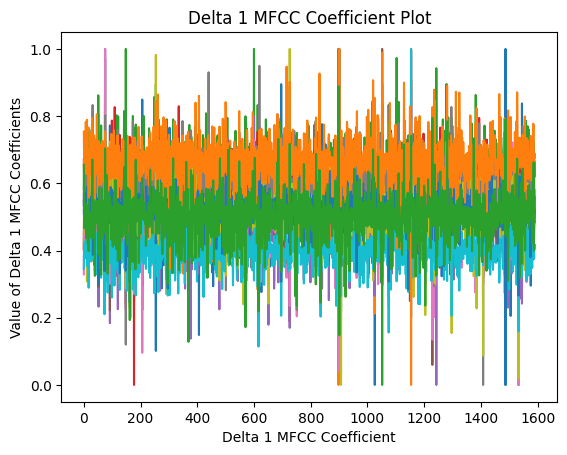

In [759]:
scaler = scaler.fit(delta1_mfcc_data)
delta1_mfcc_data  = scaler.transform(delta1_mfcc_data)
plt.ylabel('Value of Delta 1 MFCC Coefficients')
plt.xlabel('Delta 1 MFCC Coefficient')
plt.title('Delta 1 MFCC Coefficient Plot')
plt.plot(delta1_mfcc_data)

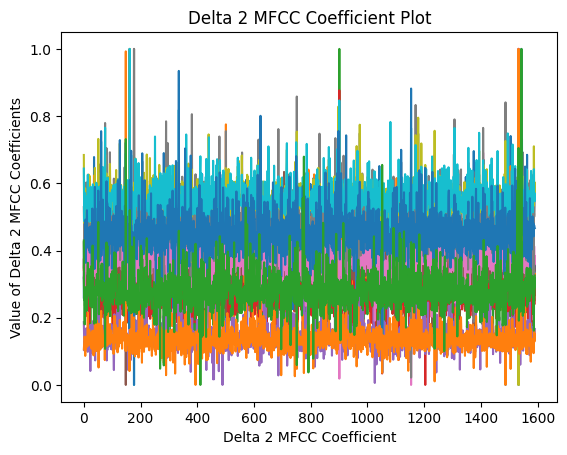

In [760]:
scaler = scaler.fit(delta2_mfcc_data)
delta2_mfcc_data  = scaler.transform(delta2_mfcc_data)
plt.ylabel('Value of Delta 2 MFCC Coefficients')
plt.xlabel('Delta 2 MFCC Coefficient')
plt.title('Delta 2 MFCC Coefficient Plot')
plt.plot(delta2_mfcc_data)


## We can observe in the above line plot, the distribution of the MFCC coefficients according to their value

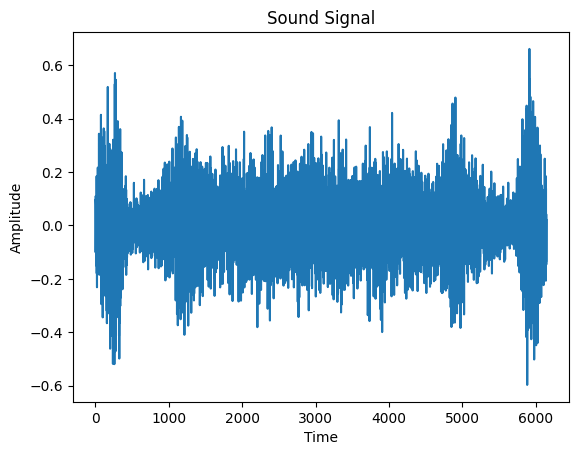

In [761]:
wav1 = librosa.feature.inverse.mfcc_to_audio(mfcc_data[3:4,:])
plt.plot(wav1)
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.title('Sound Signal')
ipd.Audio(wav1, rate = 22050)

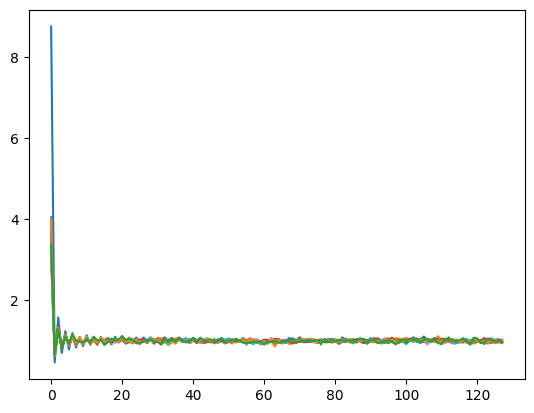

In [762]:
wav2 = librosa.feature.inverse.mfcc_to_mel(mfcc_data)
plt.plot(wav2)


## We can observe in the above Signal Graph that at each cough in the sample sound, the amplitude increases

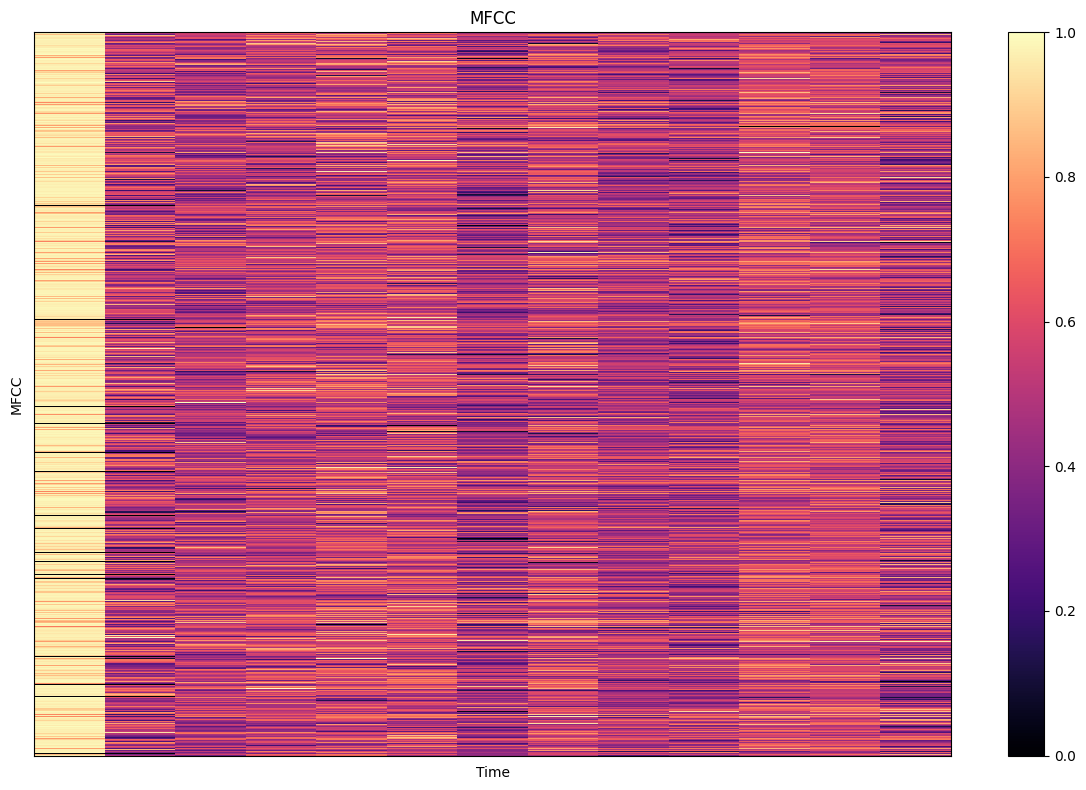

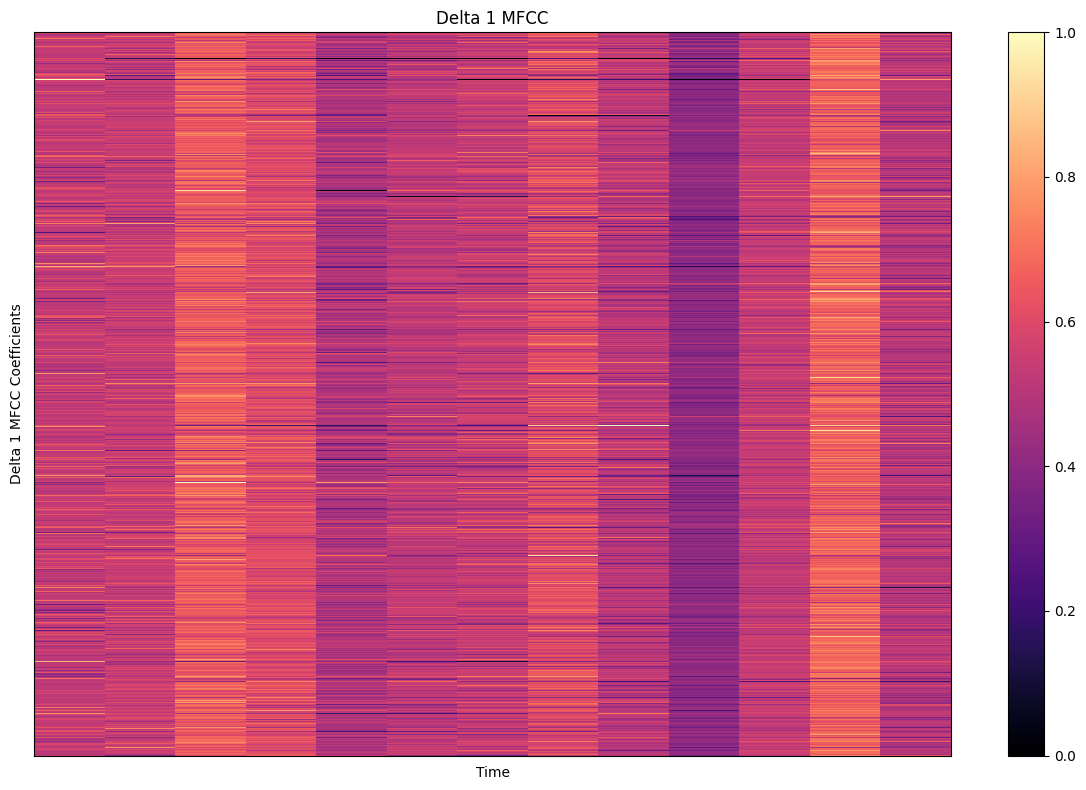

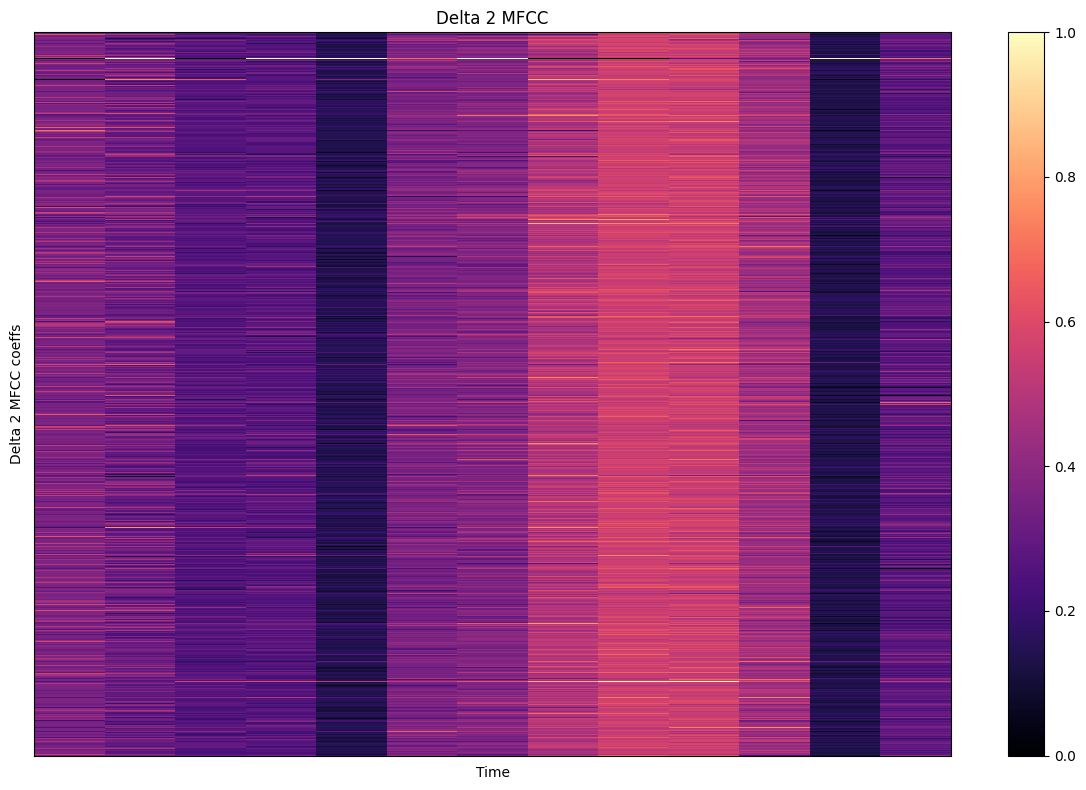

In [763]:
plt.figure(figsize=(12, 8))
librosa.display.specshow(mfcc_data)
plt.ylabel('MFCC')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

plt.figure(figsize=(12, 8))
librosa.display.specshow(delta1_mfcc_data)
plt.ylabel('Delta 1 MFCC Coefficients')
plt.xlabel('Time')
plt.title('Delta 1 MFCC')
plt.colorbar()
plt.tight_layout()

plt.figure(figsize=(12, 8))
librosa.display.specshow(delta2_mfcc_data)
plt.ylabel('Delta 2 MFCC coeffs')
plt.xlabel('Time')
plt.title('Delta 2 MFCC')
plt.colorbar()
plt.tight_layout()

## This is the spectrogram of the MFCC signal

# Merging Train Data and Test Data

In [764]:
y = training_data['status']
y

0       positive
1       negative
2       negative
3       negative
4       negative
          ...   
1586    negative
1587    negative
1588    negative
1589    negative
1590    positive
Name: status, Length: 1591, dtype: object

In [765]:
training_data=training_data.drop(['status'], axis=1)
concated_data=pd.concat([training_data,testing_data],ignore_index=True)
print(concated_data)

                                id  \
0     Tpz3FMkc1NPmXLufylt9YVf9NQG3   
1     4w3GC0eRNVXJ4q4vRLphW9RIiQY2   
2     xyDgyXrDoyXu5CFqcNe20LRjYqg1   
3     jvrGsRzHKEU4izNgLFGitM7AZVK2   
4     zvXkuEaPb0OEgG4EHx59NqdmamR2   
...                            ...   
2268  eg0RP6C379PTXguMbBE6RUKY69S2   
2269  W42AKc6SZlNz1NOBAJrCpa3Io0E2   
2270  KFtd9lY6jph5cl2VrZ9Nv8Jng7p1   
2271  NcPBzMBBxNbjK84kdCv2z4IJzLC3   
2272  IimA0GnOm7ZR4nEr8k0kG4eaR7A3   

                                                   path      date  \
0     /home/abhijeet/Desktop/extracted/20210930/Tpz3...  20210927   
1     /home/abhijeet/Desktop/extracted/20210618/4w3G...  20210609   
2     /home/abhijeet/Desktop/extracted/20200413/xyDg...  20200413   
3     /home/abhijeet/Desktop/extracted/20200418/jvrG...  20200417   
4     /home/abhijeet/Desktop/extracted/20200413/zvXk...  20200413   
...                                                 ...       ...   
2268  /home/abhijeet/Desktop/extracted/20210406/eg0R...  202

In [766]:
concated_data

,id,path,date,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,delta2_mfcc4,delta2_mfcc5,delta2_mfcc6,delta2_mfcc7,delta2_mfcc8,delta2_mfcc9,delta2_mfcc10,delta2_mfcc11,delta2_mfcc12,delta2_mfcc13
0,Tpz3FMkc1NPmXLufylt9YVf9NQG3,/home/abhijeet/Desktop/extracted/20210930/Tpz3...,20210927,0.398262,0.021807,2192.284336,1800.806374,3899.732548,0.190792,499.302490,...,0.182011,0.105570,0.102463,-0.040326,0.052916,0.182637,0.107316,-0.116739,-0.029148,0.129039
1,4w3GC0eRNVXJ4q4vRLphW9RIiQY2,/home/abhijeet/Desktop/extracted/20210618/4w3G...,20210609,0.276679,0.038540,1144.252719,961.642738,2104.043384,0.085649,253.360168,...,0.037926,0.016237,0.011370,0.002623,-0.001219,-0.005557,-0.007667,-0.009922,-0.011224,-0.012732
2,xyDgyXrDoyXu5CFqcNe20LRjYqg1,/home/abhijeet/Desktop/extracted/20200413/xyDg...,20200413,0.296851,0.062692,1751.262780,1133.773623,2917.275293,0.127885,291.390137,...,0.051888,-0.038112,0.023294,-0.085726,-0.047723,-0.085052,-0.045277,-0.019182,-0.000075,0.004684
3,jvrGsRzHKEU4izNgLFGitM7AZVK2,/home/abhijeet/Desktop/extracted/20200418/jvrG...,20200417,0.496647,0.057254,1870.679548,1861.172536,3787.404027,0.187998,488.468353,...,0.216941,0.005055,0.023386,-0.011039,0.034167,-0.022315,0.037435,-0.032717,0.022867,-0.071486
4,zvXkuEaPb0OEgG4EHx59NqdmamR2,/home/abhijeet/Desktop/extracted/20200413/zvXk...,20200413,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1131.371094,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,eg0RP6C379PTXguMbBE6RUKY69S2,/home/abhijeet/Desktop/extracted/20210406/eg0R...,20210330,0.362939,0.148949,2265.032768,1648.420755,4072.878705,0.160280,469.810150,...,-0.011712,0.076286,0.036560,-0.005114,-0.005923,-0.042513,-0.019273,0.016899,-0.033881,-0.031861
2269,W42AKc6SZlNz1NOBAJrCpa3Io0E2,/home/abhijeet/Desktop/extracted/20210406/W42A...,20210225,0.443582,0.014042,2976.220786,2614.855821,5978.851634,0.267446,491.947449,...,0.047036,0.003740,0.022099,0.030237,0.055814,0.041500,0.049073,0.031331,0.048006,0.016737
2270,KFtd9lY6jph5cl2VrZ9Nv8Jng7p1,/home/abhijeet/Desktop/extracted/20210406/KFtd...,20210226,0.494909,0.046139,2964.076475,2868.138236,6309.187887,0.160036,512.652832,...,0.049246,0.010044,0.018983,0.007649,-0.002733,0.028217,0.010384,0.020651,-0.004434,0.046863
2271,NcPBzMBBxNbjK84kdCv2z4IJzLC3,/home/abhijeet/Desktop/extracted/20210406/NcPB...,20210302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1131.370972,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [767]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

## Feature Engineering

In [768]:
X=concated_data.drop(['id','path','date'],axis = 1)

X = X.drop(['rolloff','spectral_centroid'],axis = 1)

In [769]:
X = X.drop(['chroma_stft'],axis = 1)

In [770]:
calc_vif(X)

,variables,VIF
0,rmse,4.694628
1,spectral_bandwidth,34.310804
2,zero_crossing_rate,18.968384
3,mfcc1,8.912277
4,mfcc2,13.593127
5,mfcc3,1.976195
6,mfcc4,4.092640
7,mfcc5,2.703473
8,mfcc6,3.187184
9,mfcc7,2.336118


In [771]:
X = X.values
X

array([[ 2.18070336e-02,  1.80080637e+03,  1.90791961e-01, ...,
        -1.16739444e-01, -2.91477777e-02,  1.29038885e-01],
       [ 3.85395922e-02,  9.61642738e+02,  8.56489177e-02, ...,
        -9.92154144e-03, -1.12244254e-02, -1.27319694e-02],
       [ 6.26922548e-02,  1.13377362e+03,  1.27884766e-01, ...,
        -1.91820543e-02, -7.50429608e-05,  4.68430249e-03],
       ...,
       [ 4.61389311e-02,  2.86813824e+03,  1.60036483e-01, ...,
         2.06509214e-02, -4.43369104e-03,  4.68627587e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.08991480e-02,  1.90519817e+03,  2.62424429e-01, ...,
        -6.40479941e-03,  4.41527292e-02,  9.12689324e-03]])

In [772]:
scaler = sklearn.preprocessing.StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[-0.82312085 -0.02187538  0.11446262 ... -2.74003803 -0.83206383
   2.23682384]
 [-0.23323047 -1.54426013 -1.13001532 ... -0.51470357 -0.49376101
  -0.47268885]
 [ 0.61824861 -1.2319856  -0.63010986 ... -0.70762759 -0.2833167
  -0.13983052]
 ...
 [ 0.03467698  1.91444512 -0.24956064 ...  0.12221171 -0.36558607
   0.6662806 ]
 [-1.59190701 -3.28884269 -2.14375989 ... -0.30800837 -0.28190027
  -0.22935652]
 [ 0.20249388  0.167509    0.96230784 ... -0.44143938  0.55148138
  -0.0549241 ]]


# Checking For Null Values

In [773]:
import math

In [774]:
print(np.isnan(np.sum(X)))

False


In [775]:
X[:,1] =  (X[:,1])**1/3
X[:,6] =  (X[:,6])**1/3


In [776]:
print(np.isnan(np.sum(X)))
np.isnan(X[:,1])

False


array([False, False, False, ..., False, False, False])

In [777]:
X[:,1]

array([-0.00729179, -0.51475338, -0.41066187, ...,  0.63814837,
       -1.0962809 ,  0.05583633])

In [778]:
X[:,1]

array([-0.00729179, -0.51475338, -0.41066187, ...,  0.63814837,
       -1.0962809 ,  0.05583633])

# Getting Back Test Data

In [779]:
test_data=X[1591:]
X=X[:1591]
print(X.shape,test_data.shape)


(1591, 42) (682, 42)


In [780]:
y

0       positive
1       negative
2       negative
3       negative
4       negative
          ...   
1586    negative
1587    negative
1588    negative
1589    negative
1590    positive
Name: status, Length: 1591, dtype: object

In [781]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
print(y)
print("")

[1 0 0 ... 0 0 1]



In [782]:
from sklearn.model_selection import train_test_split
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.3,random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.5, random_state=1)


In [783]:
print(X_train.shape ,X_test.shape,X_cv.shape)

(1113, 42) (239, 42) (239, 42)


In [784]:
X.min()

-13.410893832359765

In [785]:
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#lda=LDA(n_components=1)
#X_train=lda.fit_transform(X_train,y_train)
#X_test=lda.transform(X_test)
#X_cv=lda.transform(X_cv)
#test_data=lda.transform(test_data)

In [786]:
from sklearn.decomposition import PCA
# create a PCA object
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_cv=pca.transform(X_cv)
test_data=pca.transform(test_data)

# Building ANN Model

In [787]:
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [788]:
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.Input(shape = (2,)),

        Dense(128,activation = 'relu',name = 'L1',kernel_regularizer=tf.keras.regularizers.l2(0.2)),
        Dense(64,activation = 'relu', name = 'L2', kernel_regularizer=tf.keras.regularizers.l2(0.2)),
        Dense(1,activation = 'sigmoid', name = 'L3')
        
    ], name="Complex"
)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [789]:
model.fit(
    X_train,y_train,
    epochs=300
)

Epoch 1/300
35/35 [==============================] - 0s 1ms/step - loss: 14.1998 - accuracy: 0.6882
Epoch 2/300
35/35 [==============================] - 0s 967us/step - loss: 7.6136 - accuracy: 0.7799
Epoch 3/300
35/35 [==============================] - 0s 909us/step - loss: 4.0271 - accuracy: 0.7799
Epoch 4/300
35/35 [==============================] - 0s 919us/step - loss: 2.1708 - accuracy: 0.7799
Epoch 5/300
35/35 [==============================] - 0s 967us/step - loss: 1.2603 - accuracy: 0.7799
Epoch 6/300
35/35 [==============================] - 0s 976us/step - loss: 0.8365 - accuracy: 0.7799
Epoch 7/300
35/35 [==============================] - 0s 925us/step - loss: 0.6513 - accuracy: 0.7799
Epoch 8/300
35/35 [==============================] - 0s 909us/step - loss: 0.5753 - accuracy: 0.7799
Epoch 9/300
35/35 [==============================] - 0s 939us/step - loss: 0.5449 - accuracy: 0.7799
Epoch 10/300
35/35 [==============================] - 0s 953us/step - loss: 0.5339 - accurac

In [790]:
model.summary()


Model: "Complex"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 128)               384       
                                                                 
 L2 (Dense)                  (None, 64)                8256      
                                                                 
 L3 (Dense)                  (None, 1)                 65        
                                                                 
Total params: 8,705
Trainable params: 8,705
Non-trainable params: 0
_________________________________________________________________


In [791]:
train_acc = model.evaluate(X_train, y_train, verbose=0)
crossval_acc = model.evaluate(X_cv, y_cv, verbose=0)
test_acc = model.evaluate(X_test, y_test, verbose=0)
print(train_acc,crossval_acc ,test_acc)

[0.5270695090293884, 0.7798742055892944] [0.4816923439502716, 0.8158996105194092] [0.513313889503479, 0.7907949686050415]


In [792]:
predictions = model.predict(test_data)

22/22 [==============================] - 0s 809us/step


In [793]:
predictions

array([[0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.22104456],
       [0.221

In [794]:
predictions.shape

(682, 1)

In [795]:
y_hat = np.zeros(shape = (682,1))
y_hat

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [796]:
for i in range(len(predictions)):
    if predictions[i]>= 0.5:
        y_hat[i] = 1
    else:
        y_hat[i] = 0

In [797]:
y_hat = y_hat.astype(int)
y_hat

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [798]:
testing_data

,id,path,date,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,delta2_mfcc4,delta2_mfcc5,delta2_mfcc6,delta2_mfcc7,delta2_mfcc8,delta2_mfcc9,delta2_mfcc10,delta2_mfcc11,delta2_mfcc12,delta2_mfcc13
0,iOx0zPyPiMZjCWXuf3RGu8HKq8k1,/home/abhijeet/Desktop/extracted/20210630/iOx0...,20210630,0.571208,0.017260,1816.135002,1825.064974,3654.356836,0.329156,473.012207,...,0.047932,0.008922,0.043351,-0.004471,0.011867,-0.011753,0.018317,-0.013965,0.014876,-0.000094
1,loK2K444HrZUD8Plzr6q3i8y4Xg1,/home/abhijeet/Desktop/extracted/20210630/loK2...,20210628,0.571209,0.041385,2294.375713,1698.955349,4093.764134,0.247430,483.063843,...,0.065617,0.014556,-0.262961,-0.133581,0.067885,0.125742,-0.042913,-0.142627,-0.040819,0.023358
2,4ySGp3wKh0dbtEap33yRsDv3LE73,/home/abhijeet/Desktop/extracted/20210630/4ySG...,20210628,0.572991,0.042476,2250.731688,1921.030209,4345.449053,0.298141,446.946106,...,0.116110,0.005664,-0.041245,0.015386,0.038149,0.032317,0.083737,-0.013344,0.012636,-0.032964
3,YQzhlTCYjlgentYYTgVEDgNPapN2,/home/abhijeet/Desktop/extracted/20210630/YQzh...,20210628,0.602748,0.015699,2368.717332,1917.224599,4479.460413,0.216645,337.969696,...,0.007331,0.010991,0.013076,0.005653,0.016863,0.011667,-0.004189,-0.013372,0.015318,0.009977
4,BVDJ00JbBEeF6oAOYJzebbGLlGY2,/home/abhijeet/Desktop/extracted/20210630/BVDJ...,20210628,0.417870,0.071598,1623.976379,1433.130596,3053.990548,0.129508,500.875793,...,-0.107980,0.029381,0.022512,-0.011419,0.030593,-0.000441,0.102451,0.024432,0.016212,0.047978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,eg0RP6C379PTXguMbBE6RUKY69S2,/home/abhijeet/Desktop/extracted/20210406/eg0R...,20210330,0.362939,0.148949,2265.032768,1648.420755,4072.878705,0.160280,469.810150,...,-0.011712,0.076286,0.036560,-0.005114,-0.005923,-0.042513,-0.019273,0.016899,-0.033881,-0.031861
678,W42AKc6SZlNz1NOBAJrCpa3Io0E2,/home/abhijeet/Desktop/extracted/20210406/W42A...,20210225,0.443582,0.014042,2976.220786,2614.855821,5978.851634,0.267446,491.947449,...,0.047036,0.003740,0.022099,0.030237,0.055814,0.041500,0.049073,0.031331,0.048006,0.016737
679,KFtd9lY6jph5cl2VrZ9Nv8Jng7p1,/home/abhijeet/Desktop/extracted/20210406/KFtd...,20210226,0.494909,0.046139,2964.076475,2868.138236,6309.187887,0.160036,512.652832,...,0.049246,0.010044,0.018983,0.007649,-0.002733,0.028217,0.010384,0.020651,-0.004434,0.046863
680,NcPBzMBBxNbjK84kdCv2z4IJzLC3,/home/abhijeet/Desktop/extracted/20210406/NcPB...,20210302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1131.370972,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [799]:
final_df = pd.DataFrame(testing_data['id'])
final_df

,id
0,iOx0zPyPiMZjCWXuf3RGu8HKq8k1
1,loK2K444HrZUD8Plzr6q3i8y4Xg1
2,4ySGp3wKh0dbtEap33yRsDv3LE73
3,YQzhlTCYjlgentYYTgVEDgNPapN2
4,BVDJ00JbBEeF6oAOYJzebbGLlGY2
...,...
677,eg0RP6C379PTXguMbBE6RUKY69S2
678,W42AKc6SZlNz1NOBAJrCpa3Io0E2
679,KFtd9lY6jph5cl2VrZ9Nv8Jng7p1
680,NcPBzMBBxNbjK84kdCv2z4IJzLC3


In [800]:
y_hat = y_hat.reshape(-1,)

In [801]:
y_hat.shape

(682,)

In [802]:
final_df['status'] = y_hat.tolist()


In [803]:
final_df['status'] = final_df['status'].replace({1:'positive',0:'negative'})

In [804]:
print(final_df)

                               id    status
0    iOx0zPyPiMZjCWXuf3RGu8HKq8k1  negative
1    loK2K444HrZUD8Plzr6q3i8y4Xg1  negative
2    4ySGp3wKh0dbtEap33yRsDv3LE73  negative
3    YQzhlTCYjlgentYYTgVEDgNPapN2  negative
4    BVDJ00JbBEeF6oAOYJzebbGLlGY2  negative
..                            ...       ...
677  eg0RP6C379PTXguMbBE6RUKY69S2  negative
678  W42AKc6SZlNz1NOBAJrCpa3Io0E2  negative
679  KFtd9lY6jph5cl2VrZ9Nv8Jng7p1  negative
680  NcPBzMBBxNbjK84kdCv2z4IJzLC3  negative
681  IimA0GnOm7ZR4nEr8k0kG4eaR7A3  negative

[682 rows x 2 columns]


In [805]:
final_df.to_csv('new_one.csv',index = False)